<h2>
Introduction
</h2>
        
I will be doing exploratory analysis on the price and sales of avocados throughout the US. Avocados are notorious for being an expensive produce, as not only is it costly to grow but a vast majority of avocados are also grown exclusively in California.

<h2>
    Hypothesis
</h2>

Ho: There is no significant difference between average regions and seasons in average price, volume sales, and estimated gross revenue in avocados.

Ha: THere is a significant difference between average regions and seasons in average price, volume sales, or estimated gross revenue in avocados.

<h2>
Data
</h2>

The data I will be providing comes from [Kaggle](https://www.kaggle.com/neuromusic/avocado-prices). I will not be using all of the columns such as bags of avocados. Additionally, I will be doing tests on conventional avocados and not organic avocados, because organic avocados make up 2.8% of sales and skews the overall charts with its different trends. I will also be creating a couple of new columns: seasons, in which I group the dates by season, and Estimated Gross Revenue, in which I multiply average price by volume sales of avocados. As for region, I will be using the five main regions of West, South Central, Mid South, Southeast, and Northeast.

In [2]:
! pip install -U arrow

Requirement already up-to-date: arrow in c:\users\brian\anaconda3\lib\site-packages (0.15.2)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import arrow
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/briankosiadi/Capstone-1/master/avocado.csv')

In [5]:
# Dropping columns that I will not be using
avocado_df = df.drop(['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [7]:
# Creating timestamp from Date which was a string type
avocado_df['timestamps'] = avocado_df['Date'].apply(lambda x: arrow.get(x).naive)

In [8]:
# create function that grouped dates into seasons
def check_season(date):
    if date.month in (12, 1, 2):
        return 'Winter'
    elif date.month in (3, 4, 5):
        return 'Spring'
    elif date.month in (6, 7, 8):
        return 'Summer'
    elif date.month in (9, 10, 11):
        return 'Autumn'

In [9]:
avocado_df['season'] = avocado_df['timestamps'].apply(check_season)

In [10]:
avocado_df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

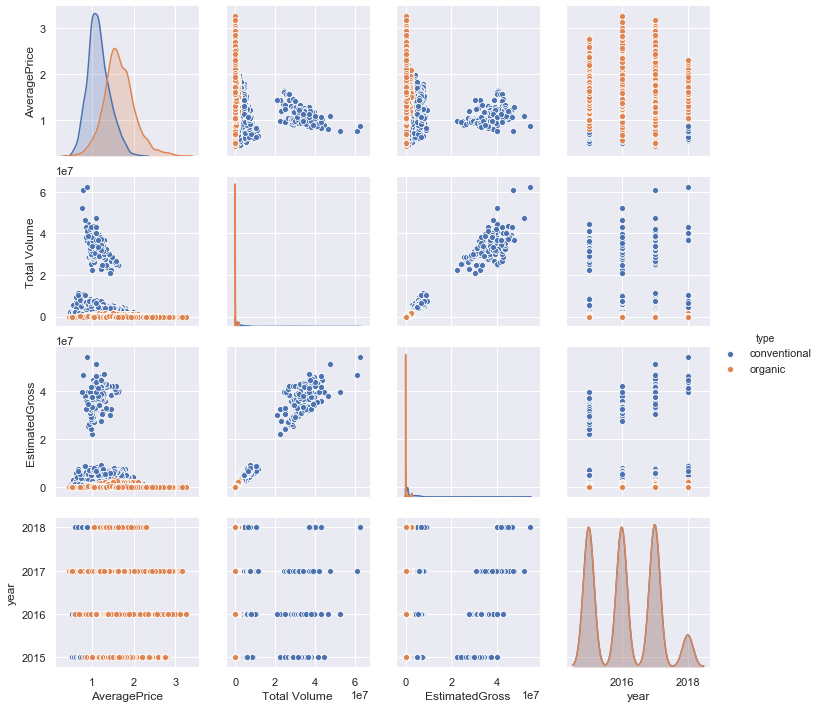

In [11]:
sns.pairplot(avocado_df, hue='type')

In [12]:
# I noticed that conventional avocados contributed to a vast majority of the two types of avocados, and because of the
# very different and non-normal trends from organic avocados, I decided to separate the two to just use conventional avocados
conventional_avocados = avocado_df.loc[avocado_df['type']=='conventional']
organic_avocados = avocado_df.loc[avocado_df['type']=='organic']

In [13]:
print('Average weekly volume sales of conventional avocados:')
conventional_avocados['Total Volume'].mean()

Average weekly volume sales of conventional avocados:


1653212.898456057

In [14]:
print('Average weekly volume sales of organic avocados:')
organic_avocados['Total Volume'].mean()

Average weekly volume sales of organic avocados:


47811.2114534693

In [15]:
# From regions, I categorized regions into the five main regions
region_filter = ['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West']
avocado_by_region = conventional_avocados[conventional_avocados['region'].isin(region_filter)]

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

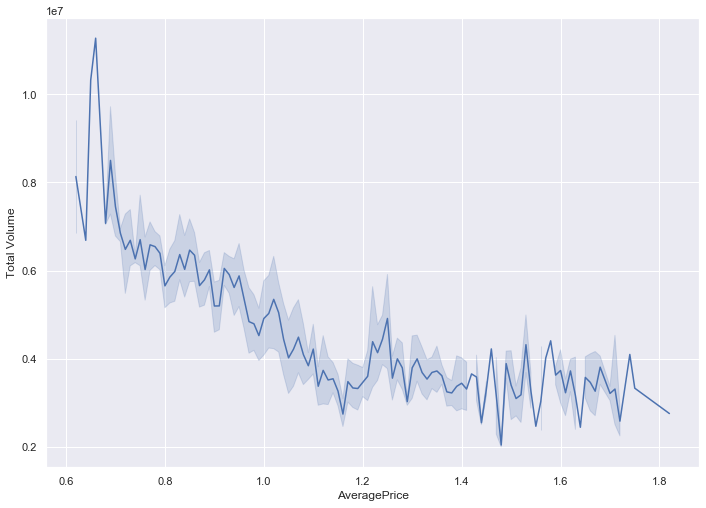

In [17]:
sns.lineplot(x='AveragePrice', y='Total Volume', data=avocado_by_region)

In [6]:
# From the graph above I see the correlation between price and volume, and I wanted to find another way to measure the sale of avocados. 
# So I added a column Estimated Gross that outputs product of Average Price and Total Volume
avocado_df.insert(3, 'EstimatedGross', (avocado_df['AveragePrice'] * avocado_df['Total Volume']))

<h2>
Method
</h2>

For this analysis I will divide my testing into the three columns - Average Price, Total Volume, and Estimated Gross Revenue. For each column, I will test for differences by region and season.

First, I check the distribution of each column for normality to decide which test to use. From there, I use the appropriate test to see if there are significant differences, use a post-hoc Tukey-HSD test to gather numerical values on the differences, and plot the values by category with either a box or line plot.

DescribeResult(nobs=845, minmax=(0.62, 1.82), mean=1.1138224852071006, variance=0.05888880731372165, skewness=0.4236718234219661, kurtosis=-0.37216599768320524)

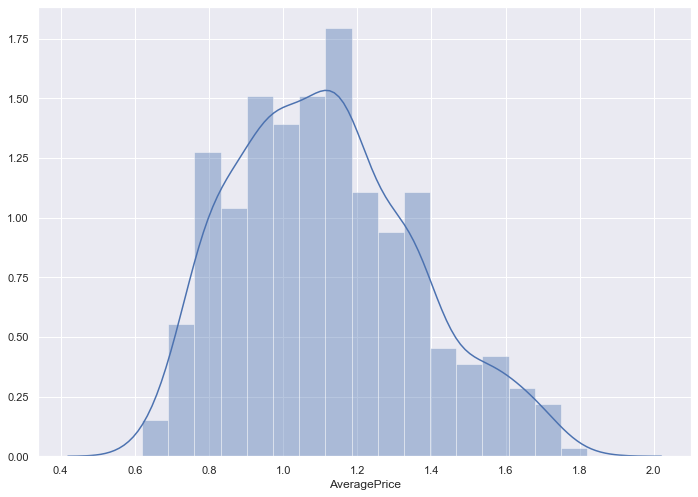

In [18]:
# Distribution of Average Price can be considered as normal
sns.distplot(avocado_by_region['AveragePrice'])
stats.describe(avocado_by_region['AveragePrice'])

In [19]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Average Price between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['AveragePrice'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['AveragePrice'])

F_onewayResult(statistic=192.42589094588556, pvalue=4.6666350132714866e-117)

In [20]:
# Tukey-HSD test shows one-to-one comparisons, almost all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['AveragePrice'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,0.1373,0.001,0.085,0.1895,True
Midsouth,SouthCentral,-0.3378,0.001,-0.39,-0.2855,True
Midsouth,Southeast,-0.0441,0.1428,-0.0964,0.0081,False
Midsouth,West,-0.2221,0.001,-0.2743,-0.1698,True
Northeast,SouthCentral,-0.475,0.001,-0.5273,-0.4228,True
Northeast,Southeast,-0.1814,0.001,-0.2337,-0.1292,True
Northeast,West,-0.3593,0.001,-0.4116,-0.3071,True
SouthCentral,Southeast,0.2936,0.001,0.2414,0.3459,True
SouthCentral,West,0.1157,0.001,0.0634,0.1679,True
Southeast,West,-0.1779,0.001,-0.2302,-0.1257,True


In [49]:
avocado_by_region.loc[avocado_by_region['region']=='Northeast'].describe()

,AveragePrice,Total Volume,EstimatedGross,year
count,169.000000,1.690000e+02,1.690000e+02,169.000000
mean,1.344438,4.077247e+06,5.420080e+06,2016.147929
std,0.189560,8.070163e+05,1.003117e+06,0.942709
min,0.870000,2.364424e+06,3.164412e+06,2015.000000
25%,1.200000,3.489057e+06,4.743074e+06,2015.000000
50%,1.320000,4.043205e+06,5.331753e+06,2016.000000
75%,1.500000,4.506893e+06,6.046873e+06,2017.000000
max,1.750000,7.508650e+06,9.160553e+06,2018.000000


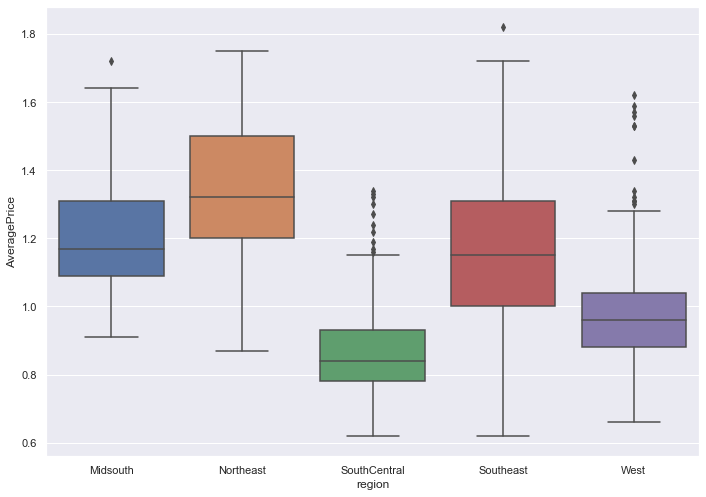

In [21]:
# From the box plot we can observe visually price ranges for each region
sns.boxplot(x='region', y='AveragePrice', data=avocado_by_region)

In [22]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Average Price between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['AveragePrice'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['AveragePrice'])

F_onewayResult(statistic=35.746293200129585, pvalue=9.511007725926344e-22)

In [23]:
# Tukey-HSD test shows one-to-one comparisons, all seasons have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['AveragePrice'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,-0.1579,0.001,-0.2159,-0.1,True
Autumn,Summer,-0.0759,0.006,-0.1356,-0.0163,True
Autumn,Winter,-0.215,0.001,-0.2721,-0.1579,True
Spring,Summer,0.082,0.0016,0.024,0.14,True
Spring,Winter,-0.057,0.0402,-0.1123,-0.0018,True
Summer,Winter,-0.139,0.001,-0.1961,-0.0819,True


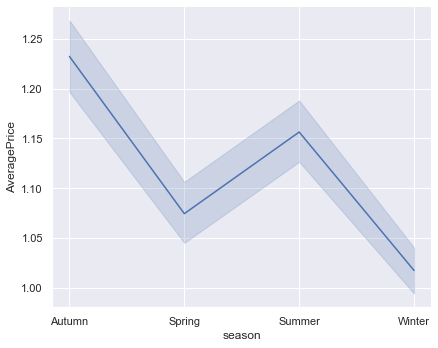

In [25]:
# We can see the correlation between price and season here
sns.relplot(x='season', y='AveragePrice', kind='line', data=avocado_by_region, height=5, aspect=1.25)

<Figure size 576x288 with 0 Axes>

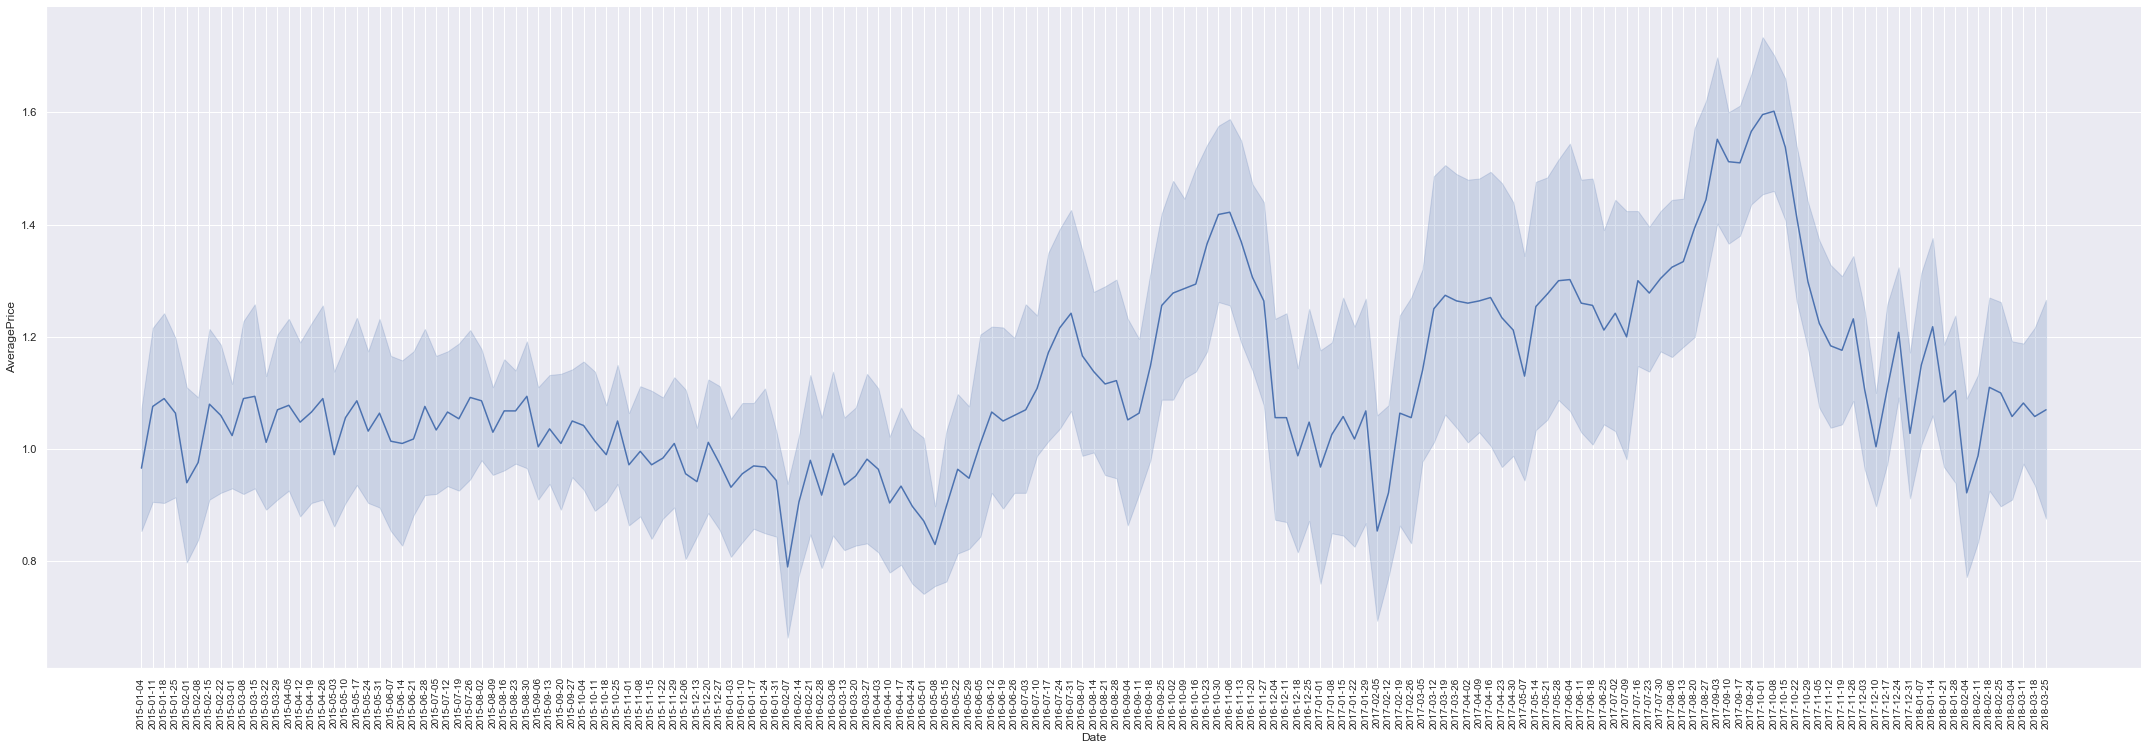

In [26]:
# This plot shows the correlation above in a cyclical manner over the course of several years
plt.figure(figsize=(8,4))
cx = sns.relplot(x='Date', y='AveragePrice', kind='line', data=avocado_by_region, height=10, aspect=3)
cx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

We can see that there

DescribeResult(nobs=845, minmax=(1845443.13, 11274749.11), mean=4529164.7657988155, variance=2524292644867.2637, skewness=0.6027532915620293, kurtosis=-0.09028622047996038)

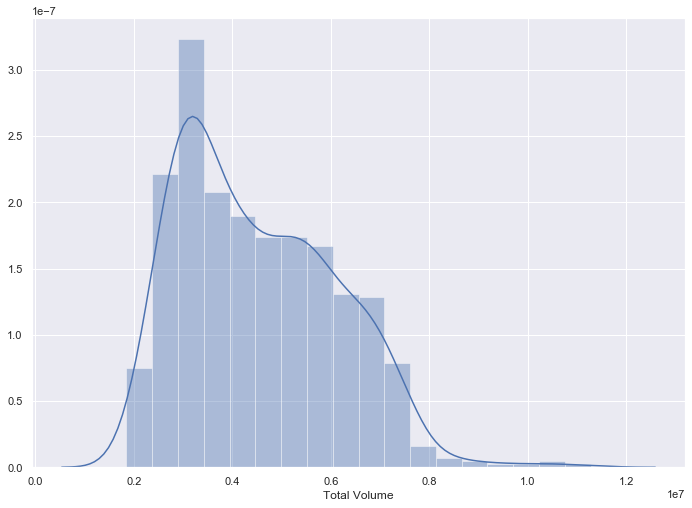

In [27]:
# Distribution of Total Volume can be considered as normal
sns.distplot(avocado_by_region['Total Volume'])
stats.describe(avocado_by_region['Total Volume'])

In [28]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Total Volume sold between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['Total Volume'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['Total Volume'])

F_onewayResult(statistic=1607.3164107397326, pvalue=0.0)

In [29]:
# Tukey-HSD test shows one-to-one comparisons, all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['Total Volume'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,1175656.1962,0.001,901766.8807,1449545.5116,True
Midsouth,SouthCentral,2975102.0014,0.001,2701212.686,3248991.3169,True
Midsouth,Southeast,679466.4905,0.001,405577.175,953355.8059,True
Midsouth,West,3307643.0368,0.001,3033753.7214,3581532.3522,True
Northeast,SouthCentral,1799445.8053,0.001,1525556.4898,2073335.1207,True
Northeast,Southeast,-496189.7057,0.001,-770079.0211,-222300.3902,True
Northeast,West,2131986.8407,0.001,1858097.5252,2405876.1561,True
SouthCentral,Southeast,-2295635.5109,0.001,-2569524.8264,-2021746.1955,True
SouthCentral,West,332541.0354,0.0083,58651.7199,606430.3508,True
Southeast,West,2628176.5463,0.001,2354287.2309,2902065.8618,True


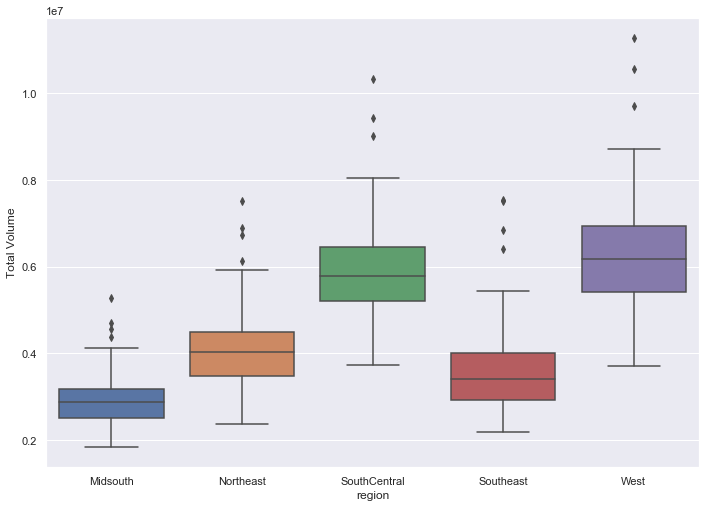

In [30]:
# sales are highest in west and south central regions
sns.boxplot(x='region', y='Total Volume', data=avocado_by_region)

In [31]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in total volume between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['Total Volume'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['Total Volume'])

F_onewayResult(statistic=22.75506695347238, pvalue=3.597694426896586e-14)

In [32]:
# Tukey-HSD test shows one-to-one comparisons, and that Autumn stands out form the other seasons.
# This si also corroborated by the fact that Autumn has the highest average price of all the seasons.
pairwise_tukeyhsd(endog=avocado_by_region['Total Volume'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,1121036.4412,0.001,733480.5734,1508592.309,True
Autumn,Summer,806119.1948,0.001,407060.6572,1205177.7323,True
Autumn,Winter,1038814.5721,0.001,657114.7958,1420514.3484,True
Spring,Summer,-314917.2464,0.1567,-702473.1142,72638.6214,False
Spring,Winter,-82221.8691,0.9,-451879.2152,287435.477,False
Summer,Winter,232695.3773,0.3981,-149004.399,614395.1536,False


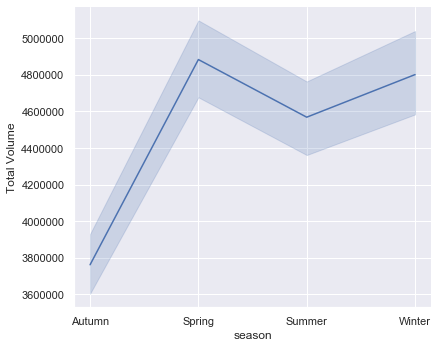

In [34]:
# Relational plot shows total volume sales in Autumn significantly lower than the other seasons.
sns.relplot(x='season', y='Total Volume', kind='line', data=avocado_by_region, height=5, aspect=1.25)

<Figure size 576x288 with 0 Axes>

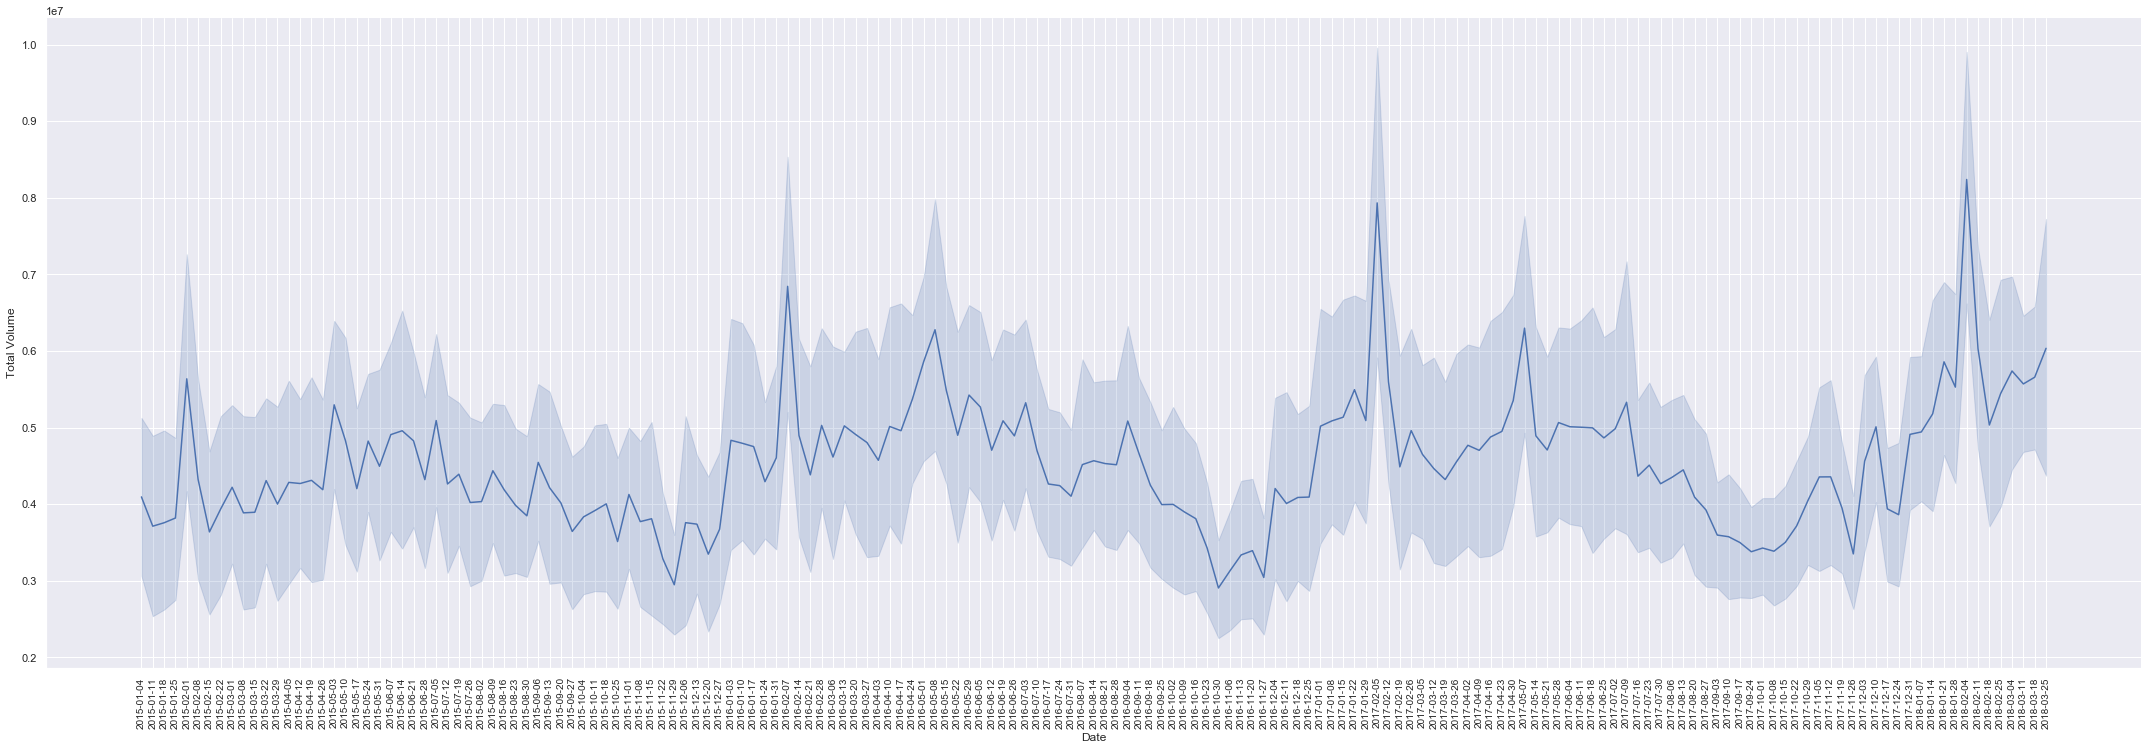

In [35]:
# Once again, we can see week to week data on total volume plotted.
plt.figure(figsize=(8,4))
bx = sns.relplot(x='Date', y='Total Volume', kind='line', data=avocado_by_region, height=10, aspect=3)
bx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

DescribeResult(nobs=845, minmax=(1937715.2865, 9160553.3294), mean=4795982.046982013, variance=1507870262076.1323, skewness=0.22637293414747928, kurtosis=-0.3747679117437155)

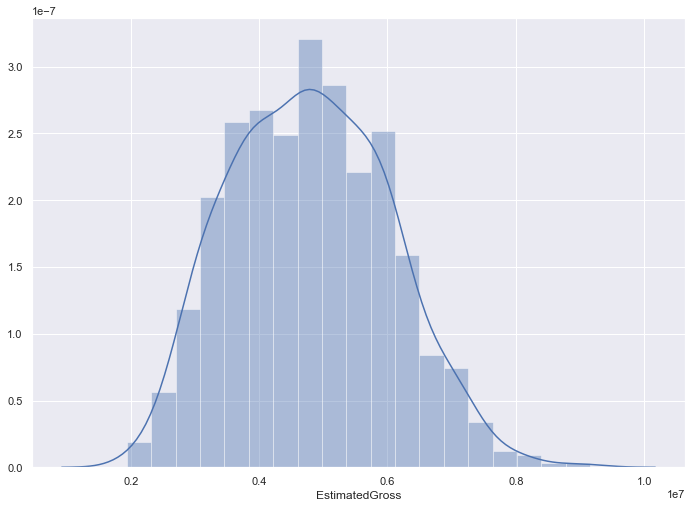

In [36]:
sns.distplot(avocado_by_region['EstimatedGross'])
stats.describe(avocado_by_region['EstimatedGross'])
# Distribution of Estimated Gross can be considered as normal

In [37]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Estimated Gross between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['EstimatedGross'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['EstimatedGross'])

F_onewayResult(statistic=256.9920881979732, pvalue=3.8711381942380526e-144)

In [38]:
# Tukey-HSD test shows one-to-one comparisons, all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['EstimatedGross'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,1947515.2761,0.001,1702048.2101,2192982.342,True
Midsouth,SouthCentral,1560109.5158,0.001,1314642.4499,1805576.5818,True
Midsouth,Southeast,595530.581,0.001,350063.515,840997.6469,True
Midsouth,West,2513931.2365,0.001,2268464.1706,2759398.3025,True
Northeast,SouthCentral,-387405.7603,0.001,-632872.8262,-141938.6943,True
Northeast,Southeast,-1351984.6951,0.001,-1597451.7611,-1106517.6292,True
Northeast,West,566415.9604,0.001,320948.8945,811883.0264,True
SouthCentral,Southeast,-964578.9349,0.001,-1210046.0008,-719111.8689,True
SouthCentral,West,953821.7207,0.001,708354.6548,1199288.7866,True
Southeast,West,1918400.6556,0.001,1672933.5896,2163867.7215,True


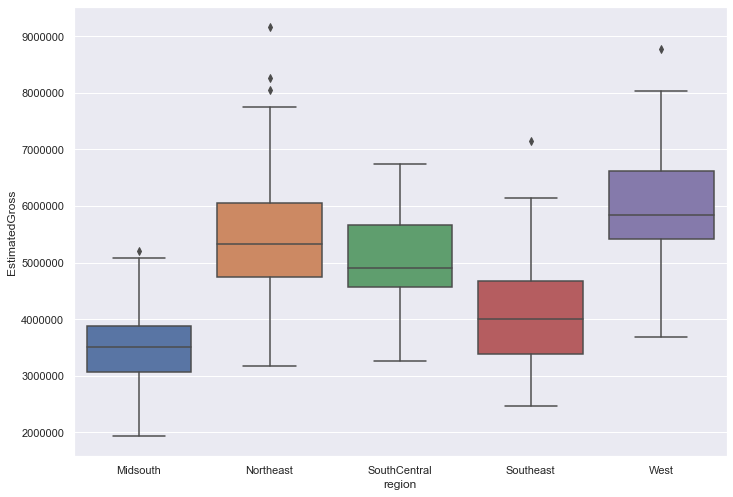

In [39]:
# Boxplot shows that west has highest amount of gross sales, and midsouth with the lowest.
sns.boxplot(x='region', y='EstimatedGross', data=avocado_by_region)

In [40]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Estimated Gross between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['EstimatedGross'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['EstimatedGross'])

F_onewayResult(statistic=12.445545465950943, pvalue=5.720060294873973e-08)

In [42]:
# Tukey-HSD test shows one-to-one comparisons, as well as mean difference in estimated gross sales as a usable output.
pairwise_tukeyhsd(endog=avocado_by_region['EstimatedGross'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,540394.7673,0.001,235632.4691,845157.0656,True
Autumn,Summer,644022.5226,0.001,330214.8703,957830.175,True
Autumn,Winter,198363.2127,0.3237,-101794.031,498520.4564,False
Spring,Summer,103627.7553,0.794,-201134.5429,408390.0536,False
Spring,Winter,-342031.5546,0.0135,-632718.9928,-51344.1164,True
Summer,Winter,-445659.3099,0.001,-745816.5537,-145502.0662,True


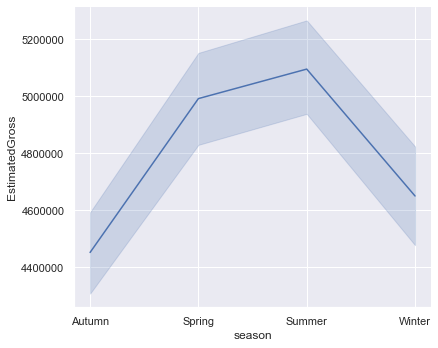

In [43]:
# Though Autumn had highest price and Winter had highest volume sales, Summer and Spring had the highest gross sales.
sns.relplot(x='season', y='EstimatedGross', kind='line', data=avocado_by_region, height=5, aspect=1.25)

<Figure size 576x288 with 0 Axes>

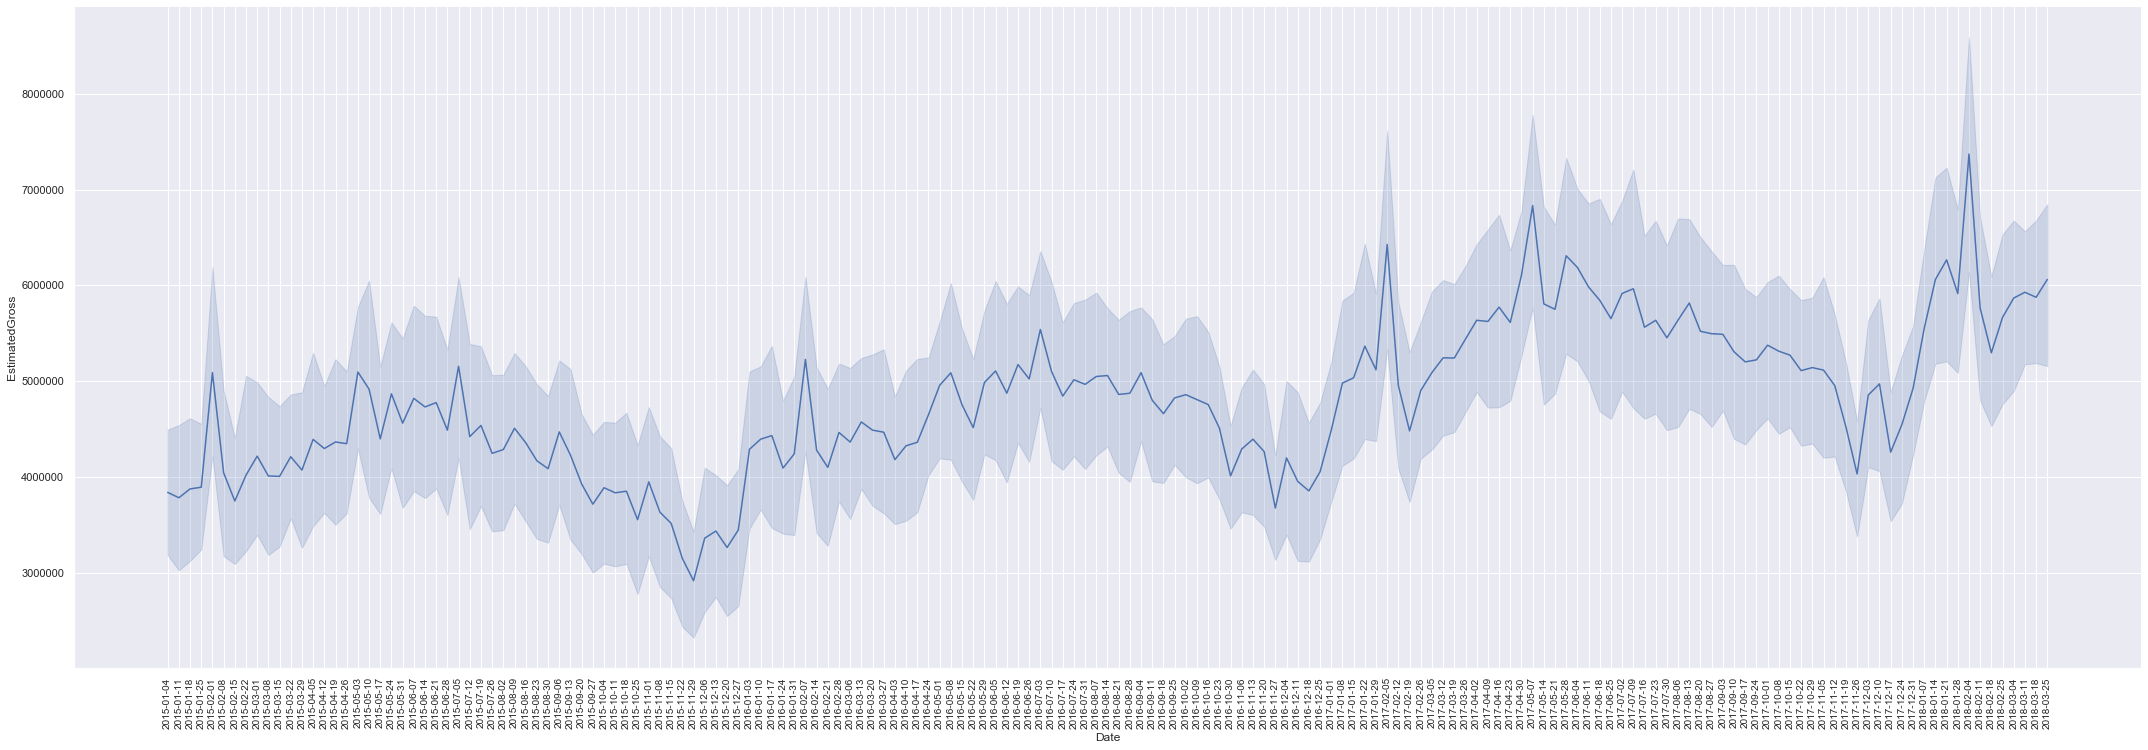

In [44]:
plt.figure(figsize=(8,4))
cx = sns.relplot(x='Date', y='EstimatedGross', kind='line', data=avocado_by_region, height=10, aspect=3)
cx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

<h2>
    Results
    </h2>

Based on the variance tests, all of the p-values returned were less than .05, rejecting the null hypothesis of a lack of difference in prices or sales. Thus, both regions where avocados are sold and the season when it is sold does contribute to its price, sale, and revenue.

<h2>
Recommendation
</h2>

The tests performed can help allocate supply to maximize revenue. Knowing that avocado revenues are highest in the Western and Northeastern regions, production companies can raise the supply in those areas to generate more revenue. Likewise, companies can also create more supply during the Summer and Spring seasons, as those two seasons are when avocado revenue is at its highest.

As for next steps, I would do research on production costs on the avocados. First, I would see if there is a difference in production cost based on the season or region, and afterwards, test to see whether those costs would outweigh the differences in revenue. Therefore, I can find the gross margin which would be a beneficial continuation of the research